<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display='diagram', transform_output='pandas')

In [2]:
#load the dataset
df = pd.read_csv('EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')

df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


In [3]:
df.drop(columns = ['CSA_Name', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CBSA','E5_Ent', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc','E8_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub','D1C5_RET','D1C5_OFF','D1C5_IND','D1C5_SVC','D1C5_ENT','D1C8_RET','D1C8_OFF','D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3AAO', 'D3AMM', 'D3APO', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D4D', 'D5CRI', 'D5CEI', 'D5DRI', 'D5DEI', 'D5CE','D2A_Ranked','D2B_Ranked','D3B_Ranked','D4A_Ranked'], inplace = True)
df.head()

,OBJECTID,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,...,D5AR,D5AE,D5BR,D5BE,D5CR,D5DR,D5DE,NatWalkInd,Shape_Length,Shape_Area
0,1,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,0.0,73.595028,73.595028,1202,...,433601,303660,135362,53504,0.000398,0.000525,0.000476,14.000000,3110.360820,297836.0831
1,2,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,0.0,119.829909,119.214200,710,...,386504,272135,236885,90089,0.000355,0.000919,0.000801,10.833333,3519.469110,484945.1466
2,3,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,0.0,26.367053,26.367050,737,...,404573,288925,230587,82815,0.000371,0.000894,0.000736,8.333333,1697.091802,106705.9281
3,4,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,0.0,119.060687,119.060687,904,...,423099,298058,168433,79657,0.000388,0.000653,0.000708,15.666667,2922.609204,481828.4303
4,5,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,169.927211,0.0,169.927211,148.742920,948,...,335700,238166,120826,48682,0.000308,0.000469,0.000433,10.166667,3731.971773,687684.7752


In [4]:
# dropping variables related to D2A_EPHHM variable
df.drop(columns = ['HH'], inplace = True)

# dropping variables related to D2b_E8MIXA variable
df.drop(columns = ['TotEmp'], inplace = True)

# dropping variables related to D3b and D4a variables
df.drop(columns = ['D4A'], inplace = True)
#df.head()

In [6]:
#identify target and features
X = df.drop(columns = 'NatWalkInd')
y = df['NatWalkInd']

In [37]:
X

,OBJECTID,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,...,D4E,D5AR,D5AE,D5BR,D5BE,D5CR,D5DR,D5DE,Shape_Length,Shape_Area
0,1,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,0.000000,73.595028,73.595028,1202,...,0.003602,433601,303660,135362,53504,0.000398,0.000525,0.000476,3110.360820,2.978361e+05
1,2,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,0.000000,119.829909,119.214200,710,...,0.006099,386504,272135,236885,90089,0.000355,0.000919,0.000801,3519.469110,4.849451e+05
2,3,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,0.000000,26.367053,26.367050,737,...,0.004071,404573,288925,230587,82815,0.000371,0.000894,0.000736,1697.091802,1.067059e+05
3,4,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,0.000000,119.060687,119.060687,904,...,0.007378,423099,298058,168433,79657,0.000388,0.000653,0.000708,2922.609204,4.818284e+05
4,5,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,169.927211,0.000000,169.927211,148.742920,948,...,0.007036,335700,238166,120826,48682,0.000308,0.000469,0.000433,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,220736,NaN,0,0,0,82.923548,0.000000,82.923548,78.187256,1471,...,-99999.000000,0,0,-99999,-99999,0.000000,-99999.000000,-99999.000000,3414.446949,3.355857e+05
220736,220737,NaN,0,0,0,72.260936,0.000000,72.260936,72.260936,940,...,-99999.000000,0,0,-99999,-99999,0.000000,-99999.000000,-99999.000000,2421.025608,2.924305e+05
220737,220738,NaN,0,0,0,40.014880,0.000000,40.014880,40.014880,878,...,-99999.000000,0,0,-99999,-99999,0.000000,-99999.000000,-99999.000000,1955.909418,1.619395e+05
220738,220739,NaN,0,0,0,2567.286469,1661.911327,905.375141,860.333055,1278,...,-99999.000000,0,0,-99999,-99999,0.000000,-99999.000000,-99999.000000,16896.768870,1.038966e+07


count    220740.000000
mean          9.541628
std           4.373952
min           1.000000
25%           5.833333
50%           9.166667
75%          13.166667
max          20.000000
Name: NatWalkInd, dtype: float64




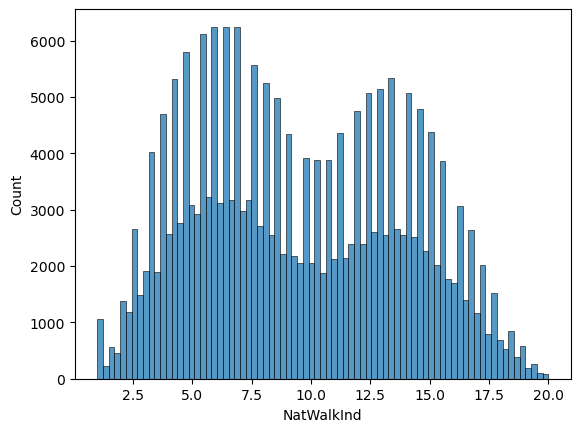

In [23]:
print(y.describe()) # describing our target variable
print('\n') # new line command
ax = sns.histplot(y) #checking the distribution of the output variable
# it has two peaks i.e. bimodal distribution
# hence assumptions of linear regression wont work
# 1. relationship between our independent and dependent variables are not linear
# 2.  redisuals are likely to be non normally distributed

In [24]:
# we can still try linear regresssion but we don't expect it to deliber good results

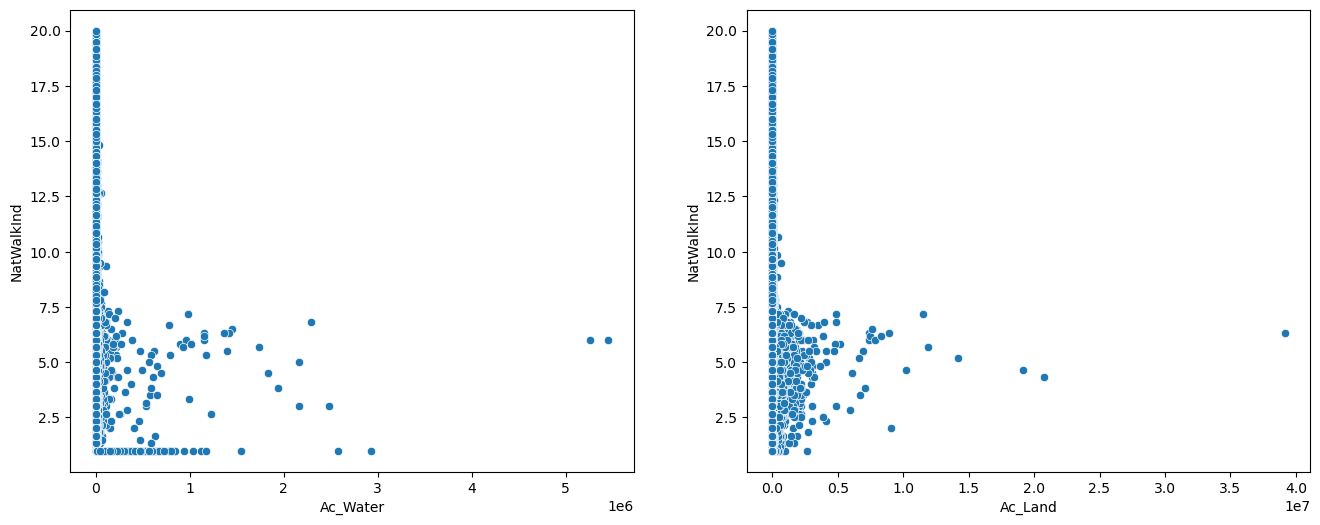

In [38]:
#scatter plot to check how randomly selected two variables are related to the walkability target variable
# looks like thesse relationships are not linear
fig, axs = plt.subplots(ncols=2, figsize= (16, 6)) # Divides the plotting area into sub-ares 
                                 
plt.subplot(1, 2, 1) # indicates there are one row two columns and this is the first plot
ax = sns.scatterplot(x='Ac_Water', y='NatWalkInd', data=df) # scatter plot 
# for x='Ac_Water', y='NatWalkInd'

plt.subplot(1, 2, 2) # indicates there are one row two columns and this is the second plot
ax = sns.scatterplot(x='Ac_Land', y='NatWalkInd', data=df) # scatter plot 
# for x='Ac_Water', y='NatWalkInd'

In [25]:
#perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
#instantiate column selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [27]:
#intantiate imputers for missing values
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

#instantiate the encoder and scalers
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False)

In [28]:
#instantiate the numerical pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [29]:
#instantiate the categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [30]:
#create the tuple for column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#create the preprocessor column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough', verbose_feature_names_out=False)

In [31]:
#transform the data
#fit only the train data
preprocessor.fit(X_train)

#trainsform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [32]:
X_train_processed

,OBJECTID,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,...,"CBSA_Name_Worthington, MN","CBSA_Name_Yakima, WA","CBSA_Name_Yankton, SD","CBSA_Name_Yauco, PR","CBSA_Name_York-Hanover, PA","CBSA_Name_Youngstown-Warren-Boardman, OH-PA","CBSA_Name_Yuba City, CA","CBSA_Name_Yuma, AZ","CBSA_Name_Zanesville, OH","CBSA_Name_Zapata, TX"
162938,0.826823,3.003217,3.009904,3.039379,-0.079893,-0.030836,-0.079528,-0.164016,0.033541,0.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25426,-1.330805,0.202831,0.129502,0.133622,-0.056064,-0.029736,-0.054283,-0.124140,1.274285,2.528233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131964,0.340826,-0.690861,-0.678834,-0.680828,0.517257,0.045003,0.544007,1.336929,-0.729684,0.519505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199794,1.405111,-0.686036,-0.674233,-0.680630,0.130399,-0.027758,0.144505,0.504475,0.279872,0.285810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200487,1.415985,-0.585300,-0.580691,-0.586108,-0.079080,-0.030836,-0.078659,-0.161333,-0.348072,-0.780260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.151207,-0.489208,-0.446815,-0.473697,-0.077341,-0.030789,-0.076811,-0.155630,1.067326,0.587776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,-0.102743,-0.684844,-0.675425,-0.675412,0.274086,0.040535,0.285119,0.961541,-0.162313,0.375087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,0.340324,-0.154384,-0.131869,-0.125403,-0.069920,-0.030836,-0.068876,-0.131136,3.137925,3.218815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,0.574661,3.003217,3.009904,3.039379,-0.079237,-0.030836,-0.078827,-0.161852,-0.757951,-0.819646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
y_train

162938    15.500000
25426      4.500000
131964     3.166667
199794     3.333333
200487    12.333333
            ...    
119879    11.833333
103694     4.833333
131932     8.666667
146867    15.166667
121958     1.833333
Name: NatWalkInd, Length: 165555, dtype: float64

In [34]:
from sklearn.decomposition import PCA

In [39]:
#fit data for pca
pca = PCA(n_components = 0.9) # keeping 90% variance
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

pca.fit(X_train_pca)

PCA(n_components=0.9)

In [48]:
from sklearn.linear_model import LinearRegression # using sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
lm = LinearRegression(fit_intercept=True) # creates a linear regression instance
lm.fit(X_train_pca, y_train) # fits the data to find the model coeffs

LinearRegression()

In [60]:
# prints the model coefficients
print('Model coefficients:') 
print(lm.coef_)

pred_vs_actual = pd.DataFrame()
pred_vs_actual['actual'] = y_train
pred_vs_actual['predicted'] = np.round(lm.predict(X_train_pca), 0)
pred_vs_actual['error'] = pred_vs_actual['actual'] - pred_vs_actual['predicted']
mse_train = mean_squared_error(y_train, pred_vs_actual['predicted'])

# prints the R2 value which shows the percent of variance explained by the model
# 100% is a perfect model
# 0 is useles

print('\n')

print('R2 value of train data: ' + str(round(100*lm.score(X_train_pca, 
                                               y_train), 2))) # 2 refers to decimal points 
print('\n')


# Builds a new dataframe that will contain the actual target values
# predicted target values variables
# and Error (Residuals) (Actual - Target)
# Note that the higher the error the worse the model
# Higher the R2, better the model


print(pred_vs_actual)

print('Mean Squared Error of Train Data ',mse_train )


Model coefficients:
[ 0.96966168  0.08429001 -0.23996556  0.35782411 -1.26710176  0.2083531
  0.33647746 -0.0346652   0.24813806  0.25555267 -0.5290446  -0.28927846
 -0.05594113  0.25557263 -0.23122413 -0.1121685  -0.01479115  0.04531493]


R2 value of train data: 81.14


           actual  predicted     error
162938  15.500000       11.0  4.500000
25426    4.500000        6.0 -1.500000
131964   3.166667        4.0 -0.833333
199794   3.333333        5.0 -1.666667
200487  12.333333       14.0 -1.666667
...           ...        ...       ...
119879  11.833333       13.0 -1.166667
103694   4.833333        5.0 -0.166667
131932   8.666667        7.0  1.666667
146867  15.166667       13.0  2.166667
121958   1.833333        4.0 -2.166667

[165555 rows x 3 columns]
Mean Squared Error of Train Data  3.686478478104092


In [62]:
# same for th test data
pred_vs_actual_test = pd.DataFrame()


pred_vs_actual_test['actual'] = y_test
pred_vs_actual_test['predicted'] = np.round(lm.predict(X_test_pca), 0)
pred_vs_actual_test['error'] = pred_vs_actual_test['actual'] - pred_vs_actual_test['predicted']
mse_test = mean_squared_error(y_test, pred_vs_actual_test['predicted'])

# prints the R2 value which shows the percent of variance explained by the model
# 100% is a perfect model
# 0 is useles

print('\n')
print('R2 value of train data: ' + str(round(100*lm.score(X_test_pca, 
                                               y_test), 2))) # 2 refers to decimal points 
print('\n')
print(pred_vs_actual_test)
print('Mean Squared Error of Train Data ', mse_test )



R2 value of train data: 80.92


           actual  predicted     error
125144   4.500000        5.0 -0.500000
155515   5.000000        3.0  2.000000
89340   13.500000       15.0 -1.500000
30371    1.500000        5.0 -3.500000
41840   16.333333       15.0  1.333333
...           ...        ...       ...
21063    5.166667        5.0  0.166667
196044  12.333333       11.0  1.333333
148205  11.166667       11.0  0.166667
148751   3.000000        3.0  0.000000
97767    5.000000       10.0 -5.000000

[55185 rows x 3 columns]
Mean Squared Error of Train Data  3.7567756938906345
